In [4]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
# from copy import deepcopy
# from scipy import stats
# from scipy.stats import chisquare

In [5]:
activities = pd.read_csv('original_data/activity.csv')
grades = pd.read_csv('original_data/grades_numeric.csv')

In [6]:
activity_grade = pd.merge(activities, grades, on=['egoid'])
activity_grade.to_csv('original_data/activity_grade.csv', index=False)

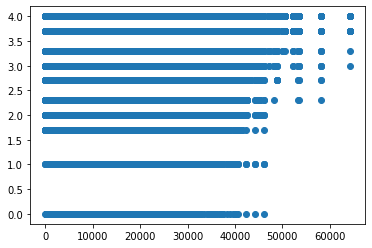

In [7]:
x = activity_grade.steps
y = activity_grade.grade

plt.scatter(x, y)

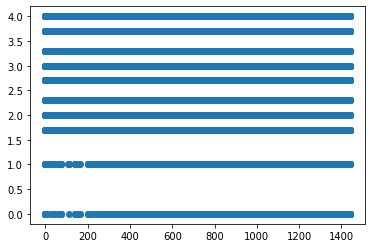

In [8]:
x = activity_grade.sedentaryminutes
y = activity_grade.grade

plt.scatter(x, y)

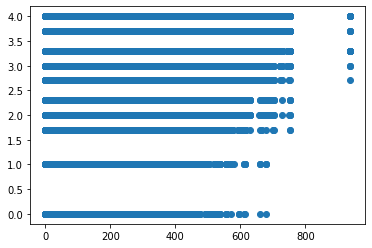

In [9]:
x = activity_grade.lightlyactiveminutes
y = activity_grade.grade

plt.scatter(x, y)

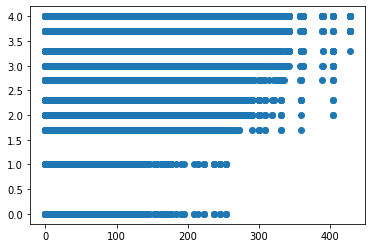

In [10]:
x = activity_grade.fairlyactiveminutes
y = activity_grade.grade

plt.scatter(x, y)

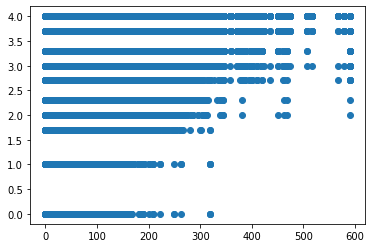

In [11]:
x = activity_grade.veryactiveminutes
y = activity_grade.grade

plt.scatter(x, y)

<AxesSubplot:>

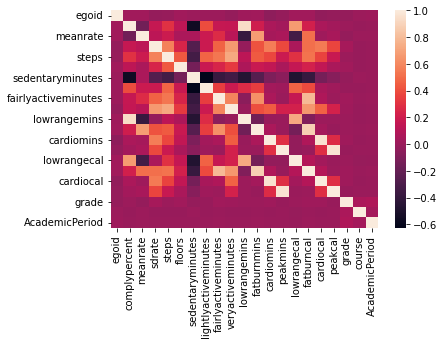

In [12]:
sns.heatmap(activity_grade.corr())